In [1]:
# Essential imports for data science and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PyTorch for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           f1_score, precision_score, recall_score)
from sklearn.utils.class_weight import compute_class_weight

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Configure visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Environment Setup:")
print(f"   Device: {device}")
print(f"   PyTorch Version: {torch.__version__}")
print(f"   Pandas Version: {pd.__version__}")
print(f"   NumPy Version: {np.__version__}")

if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

print("\n✅ All libraries imported successfully!")
print("📊 Ready to begin customer churn analysis...")

🚀 Environment Setup:
   Device: cpu
   PyTorch Version: 2.8.0+cpu
   Pandas Version: 2.3.3
   NumPy Version: 2.3.3

✅ All libraries imported successfully!
📊 Ready to begin customer churn analysis...


In [2]:
# Business Implementation: Customer Retention Management System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class ChurnRetentionSystem:
    """
    Enterprise-ready Customer Retention Management System

    This system operationalizes the churn prediction model within a business context,
    handling the entire workflow from risk prediction to intervention tracking.
    """

    def __init__(self, prediction_model, customer_database_conn=None, crm_api=None):
        """
        Initialize the retention management system

        Args:
            prediction_model: Trained churn prediction model
            customer_database_conn: Connection to customer database (simulated)
            crm_api: Connection to CRM system (simulated)
        """
        self.model = prediction_model
        self.customer_db = customer_database_conn
        self.crm_api = crm_api

        # Define risk categories and associated actions
        self.risk_categories = {
            'very_high': {'threshold': 0.8, 'priority': 'Critical'},
            'high': {'threshold': 0.6, 'priority': 'High'},
            'medium': {'threshold': 0.4, 'priority': 'Medium'},
            'low': {'threshold': 0.2, 'priority': 'Low'},
            'very_low': {'threshold': 0.0, 'priority': 'Monitor'}
        }

        # Define retention strategies by customer segment and risk level
        self.retention_strategies = {
            'high_value_very_high_risk': [
                'Executive outreach call',
                'Premium service upgrade',
                'Personalized long-term contract',
                'Dedicated account manager'
            ],
            'high_value_high_risk': [
                'Loyalty program upgrade',
                'Bundled service discount',
                'Complimentary premium feature'
            ],
            'medium_value_high_risk': [
                'Targeted discount offer',
                'Service review call',
                'Contract extension incentive'
            ],
            'standard_high_risk': [
                'Retention email campaign',
                'Satisfaction survey with offer',
                'Digital service upgrade'
            ],
            'medium_risk': [
                'Educational content',
                'Loyalty program invitation',
                'Cross-sell recommendation'
            ],
            'low_risk': [
                'Standard marketing',
                'Product updates',
                'Periodic satisfaction check'
            ]
        }

        # Initialize intervention tracking
        self.interventions = []
        self.campaign_results = {}

        print(f"🏢 Customer Retention Management System initialized")
        print(f"   • Risk categories defined: {len(self.risk_categories)}")
        print(f"   • Retention strategies defined: {len(self.retention_strategies)}")

    def get_customer_segment(self, customer_data):
        """
        Determine customer segment based on value and tenure

        Args:
            customer_data (dict): Customer information

        Returns:
            str: Customer segment category
        """
        # Calculate customer value score (simplified)
        monthly_charges = customer_data.get('MonthlyCharges', 0)
        tenure = customer_data.get('tenure', 0)
        contract = customer_data.get('Contract', 'Month-to-month')

        # Calculate customer lifetime value (simplified)
        contract_multiplier = 1
        if contract == 'One year':
            contract_multiplier = 1.2
        elif contract == 'Two year':
            contract_multiplier = 1.5

        customer_value = monthly_charges * max(tenure, 1) * contract_multiplier

        # Determine segment
        if customer_value > 2000 and tenure > 24:
            return 'high_value'
        elif customer_value > 1000 or tenure > 12:
            return 'medium_value'
        else:
            return 'standard'

    def get_risk_category(self, churn_probability):
        """
        Determine risk category from churn probability

        Args:
            churn_probability (float): Predicted churn probability

        Returns:
            str: Risk category
        """
        for category, details in sorted(
            self.risk_categories.items(),
            key=lambda x: x[1]['threshold'],
            reverse=True
        ):
            if churn_probability >= details['threshold']:
                return category
        return 'very_low'

    def recommend_retention_action(self, customer_data, churn_probability):
        """
        Recommend appropriate retention actions based on customer profile and risk

        Args:
            customer_data (dict): Customer information
            churn_probability (float): Predicted churn probability

        Returns:
            dict: Recommended retention actions and details
        """
        # Get customer segment and risk category
        segment = self.get_customer_segment(customer_data)
        risk_category = self.get_risk_category(churn_probability)

        # Determine appropriate strategy key
        strategy_key = f"{segment}_{risk_category}"

        # Default to segment-based strategy if specific one not found
        if strategy_key not in self.retention_strategies:
            if risk_category in ['very_high', 'high']:
                strategy_key = f"{segment}_high_risk"
            elif risk_category in ['medium']:
                strategy_key = 'medium_risk'
            else:
                strategy_key = 'low_risk'

        # Get the recommended actions
        actions = self.retention_strategies.get(
            strategy_key,
            self.retention_strategies['low_risk']
        )

        # Calculate intervention budget based on customer value and risk
        monthly_value = customer_data.get('MonthlyCharges', 50)
        max_budget = monthly_value * 3  # Up to 3 months revenue for retention

        # Adjust budget by risk level
        risk_multiplier = {
            'very_high': 1.0,
            'high': 0.8,
            'medium': 0.5,
            'low': 0.3,
            'very_low': 0.1
        }.get(risk_category, 0.1)

        recommended_budget = max_budget * risk_multiplier

        return {
            'customer_id': customer_data.get('customerID', 'unknown'),
            'segment': segment,
            'risk_category': risk_category,
            'churn_probability': churn_probability,
            'priority': self.risk_categories[risk_category]['priority'],
            'recommended_actions': actions,
            'intervention_budget': recommended_budget,
            'expected_roi': self.calculate_expected_roi(monthly_value, churn_probability, recommended_budget)
        }

    def calculate_expected_roi(self, monthly_value, churn_probability, intervention_cost):
        """
        Calculate expected ROI of retention intervention

        Args:
            monthly_value (float): Customer's monthly revenue
            churn_probability (float): Predicted probability of churn
            intervention_cost (float): Cost of retention intervention

        Returns:
            float: Expected ROI percentage
        """
        # Assumptions
        avg_customer_lifespan = 24  # months
        retention_success_rate = self.get_retention_success_rate(churn_probability)

        # Calculate expected revenue if retained
        future_revenue = monthly_value * avg_customer_lifespan

        # Expected value calculation
        expected_value = future_revenue * retention_success_rate * churn_probability

        # ROI calculation
        roi = ((expected_value - intervention_cost) / intervention_cost) * 100

        return max(roi, -100)  # Cap at -100% ROI

    def get_retention_success_rate(self, churn_probability):
        """
        Estimate success rate of retention efforts based on churn probability

        Args:
            churn_probability (float): Predicted probability of churn

        Returns:
            float: Estimated retention success rate
        """
        # Higher churn probability means customer more likely to leave,
        # so retention efforts are less likely to succeed
        base_success_rate = 0.7  # 70% base success rate

        # Adjust based on how certain the customer is about leaving
        # Very high churn probabilities indicate stronger intent to leave
        certainty_factor = 1 - (churn_probability * 0.5)

        return base_success_rate * certainty_factor

    def execute_retention_campaign(self, customer_ids=None, simulation=True):
        """
        Execute retention campaign for selected customers

        Args:
            customer_ids (list): List of customer IDs to target (None = all high risk)
            simulation (bool): Whether to run in simulation mode

        Returns:
            dict: Campaign results summary
        """
        if simulation:
            print(f"🚀 Simulating retention campaign execution...")
        else:
            print(f"🚀 Executing retention campaign...")

        # Generate or retrieve customers
        if customer_ids is None:
            customers = self.get_high_risk_customers(simulation=simulation)
        else:
            customers = self.get_customers_by_ids(customer_ids, simulation=simulation)

        # Process each customer and recommend actions
        recommendations = []
        total_budget = 0

        for customer in customers:
            # Get churn probability (from stored predictions or generate new ones)
            churn_prob = customer.get('churn_probability', random.uniform(0.5, 0.9))

            # Get recommendations
            recommendation = self.recommend_retention_action(customer, churn_prob)
            recommendations.append(recommendation)
            total_budget += recommendation['intervention_budget']

        # Track campaign
        campaign_id = f"RTN{datetime.now().strftime('%Y%m%d%H%M')}"
        self.campaign_results[campaign_id] = {
            'timestamp': datetime.now(),
            'customers_targeted': len(customers),
            'total_budget': total_budget,
            'avg_churn_probability': np.mean([r['churn_probability'] for r in recommendations]),
            'recommendations': recommendations,
            'status': 'simulated' if simulation else 'in_progress'
        }

        # In simulation mode, generate outcome
        if simulation:
            self.simulate_campaign_outcomes(campaign_id)

        # Print campaign summary
        print(f"📋 Campaign {campaign_id} planned:")
        print(f"   • Customers targeted: {len(customers)}")
        print(f"   • Total budget: ${total_budget:,.2f}")
        print(f"   • Average churn probability: {self.campaign_results[campaign_id]['avg_churn_probability']:.2%}")

        if simulation:
            results = self.campaign_results[campaign_id]['results']
            print(f"\n📊 Simulated outcomes:")
            print(f"   • Customers retained: {results['customers_retained']} ({results['retention_rate']:.1%})")
            print(f"   • Revenue protected: ${results['revenue_protected']:,.2f}")
            print(f"   • ROI: {results['roi']:.1f}%")

        return {
            'campaign_id': campaign_id,
            'recommendations': recommendations,
            'summary': self.campaign_results[campaign_id]
        }

    def get_high_risk_customers(self, simulation=True):
        """
        Get list of high risk customers

        Args:
            simulation (bool): Whether to generate simulated customers

        Returns:
            list: Customer data for high risk customers
        """
        if simulation:
            # Generate simulated high-risk customers
            return self.generate_simulated_customers(100, high_risk=True)
        else:
            # Would query real database in production
            if self.customer_db is None:
                raise ValueError("Real customer database connection required")

            # Pseudocode for querying database:
            # high_risk_customers = self.customer_db.query("""
            #    SELECT * FROM customers
            #    WHERE churn_probability > 0.6
            #    ORDER BY monthly_charges DESC
            #    LIMIT 100
            # """)
            # return high_risk_customers

            # For now, return simulated data with warning
            print("⚠️ Using simulated customer data (no database connection)")
            return self.generate_simulated_customers(100, high_risk=True)

    def get_customers_by_ids(self, customer_ids, simulation=True):
        """Get customer data for specific IDs"""
        if simulation:
            return self.generate_simulated_customers(len(customer_ids))
        else:
            # Would query real database in production
            # Pseudocode: return self.customer_db.get_by_ids(customer_ids)
            return self.generate_simulated_customers(len(customer_ids))

    def generate_simulated_customers(self, count=100, high_risk=False):
        """Generate simulated customer data for demonstrations"""
        import random

        customers = []

        for i in range(count):
            # Generate more realistic churn probability distribution
            if high_risk:
                churn_prob = random.uniform(0.6, 0.95)
            else:
                churn_prob = random.uniform(0.05, 0.8)

            # Generate customer profile that would reasonably have this churn probability
            if churn_prob > 0.7:
                # High churn risk profile - month-to-month, high charges, low tenure
                contract = "Month-to-month"
                tenure = random.randint(1, 12)
                monthly_charges = random.uniform(70, 110)
            elif churn_prob > 0.4:
                # Medium risk - mixed contract types, medium tenure
                contract = random.choice(["Month-to-month", "One year"])
                tenure = random.randint(6, 24)
                monthly_charges = random.uniform(50, 90)
            else:
                # Low risk - longer contracts, longer tenure
                contract = random.choice(["One year", "Two year"])
                tenure = random.randint(18, 60)
                monthly_charges = random.uniform(30, 80)

            # Create customer record
            customer = {
                'customerID': f'CUST{100000 + i}',
                'gender': random.choice(['Male', 'Female']),
                'SeniorCitizen': random.choice([0, 1]),
                'Partner': random.choice(['Yes', 'No']),
                'Dependents': random.choice(['Yes', 'No']),
                'tenure': tenure,
                'PhoneService': random.choice(['Yes', 'No']),
                'MultipleLines': random.choice(['Yes', 'No', 'No phone service']),
                'InternetService': random.choice(['DSL', 'Fiber optic', 'No']),
                'OnlineSecurity': random.choice(['Yes', 'No', 'No internet service']),
                'OnlineBackup': random.choice(['Yes', 'No', 'No internet service']),
                'DeviceProtection': random.choice(['Yes', 'No', 'No internet service']),
                'TechSupport': random.choice(['Yes', 'No', 'No internet service']),
                'StreamingTV': random.choice(['Yes', 'No', 'No internet service']),
                'StreamingMovies': random.choice(['Yes', 'No', 'No internet service']),
                'Contract': contract,
                'PaperlessBilling': random.choice(['Yes', 'No']),
                'PaymentMethod': random.choice([
                    'Electronic check', 'Mailed check',
                    'Bank transfer (automatic)', 'Credit card (automatic)'
                ]),
                'MonthlyCharges': monthly_charges,
                'TotalCharges': monthly_charges * tenure,
                'churn_probability': churn_prob
            }

            customers.append(customer)

        return customers

    def simulate_campaign_outcomes(self, campaign_id):
        """
        Simulate outcomes of retention campaign

        Args:
            campaign_id (str): ID of campaign to simulate
        """
        if campaign_id not in self.campaign_results:
            raise ValueError(f"Campaign {campaign_id} not found")

        campaign = self.campaign_results[campaign_id]
        recommendations = campaign['recommendations']

        # Simulate retention outcomes
        retained_count = 0
        total_protected_revenue = 0

        for rec in recommendations:
            # Calculate retention probability based on churn risk and actions
            base_retention_prob = self.get_retention_success_rate(rec['churn_probability'])

            # Adjust based on intervention budget (more budget = better chance)
            budget_factor = min(rec['intervention_budget'] / 100, 0.3)  # Cap at 30% boost
            retention_probability = min(base_retention_prob + budget_factor, 0.95)  # Cap at 95%

            # Simulate outcome
            retained = np.random.random() < retention_probability

            if retained:
                retained_count += 1
                # Estimate protected revenue (simplified: 1 year of revenue)
                monthly_charges = rec.get('monthly_charges', 50)  # Default if not in data
                protected_revenue = monthly_charges * 12
                total_protected_revenue += protected_revenue

        # Calculate campaign metrics
        retention_rate = retained_count / len(recommendations) if recommendations else 0
        campaign_cost = campaign['total_budget']
        roi = ((total_protected_revenue - campaign_cost) / campaign_cost) * 100 if campaign_cost > 0 else 0

        # Store results
        self.campaign_results[campaign_id]['results'] = {
            'customers_retained': retained_count,
            'retention_rate': retention_rate,
            'revenue_protected': total_protected_revenue,
            'campaign_cost': campaign_cost,
            'roi': roi,
            'status': 'completed'
        }

    def generate_executive_dashboard(self, timeframe_days=90):
        """
        Generate executive dashboard of retention campaigns

        Args:
            timeframe_days (int): Number of days to include in dashboard

        Returns:
            Dashboard metrics and visualizations
        """
        print(f"📊 Generating Executive Dashboard...")

        # Filter campaigns within timeframe
        cutoff_date = datetime.now() - timedelta(days=timeframe_days)
        recent_campaigns = {
            cid: campaign for cid, campaign in self.campaign_results.items()
            if campaign['timestamp'] >= cutoff_date and 'results' in campaign
        }

        if not recent_campaigns:
            print("⚠️ No completed campaigns in the selected timeframe")
            # Generate a simulation for demonstration
            print("   Generating simulation data for demonstration...")
            self.execute_retention_campaign(simulation=True)
            recent_campaigns = {
                cid: campaign for cid, campaign in self.campaign_results.items()
                if campaign['timestamp'] >= cutoff_date and 'results' in campaign
            }

        # Extract key metrics
        campaign_dates = []
        retention_rates = []
        roi_values = []
        revenue_protected_values = []
        customers_targeted = []
        campaign_costs = []

        for cid, campaign in sorted(recent_campaigns.items(), key=lambda x: x[1]['timestamp']):
            results = campaign['results']
            campaign_dates.append(campaign['timestamp'])
            retention_rates.append(results['retention_rate'] * 100)  # Convert to percentage
            roi_values.append(results['roi'])
            revenue_protected_values.append(results['revenue_protected'] / 1000)  # Convert to thousands
            customers_targeted.append(campaign['customers_targeted'])
            campaign_costs.append(results['campaign_cost'] / 1000)  # Convert to thousands

        # Calculate summary metrics
        total_customers = sum(customers_targeted)
        total_retained = sum(c['results']['customers_retained'] for c in recent_campaigns.values())
        total_revenue_protected = sum(c['results']['revenue_protected'] for c in recent_campaigns.values())
        total_campaign_cost = sum(c['results']['campaign_cost'] for c in recent_campaigns.values())
        overall_roi = ((total_revenue_protected - total_campaign_cost) / total_campaign_cost) * 100 if total_campaign_cost > 0 else 0
        avg_retention_rate = total_retained / total_customers if total_customers > 0 else 0

        # Generate visualizations
        fig = plt.figure(figsize=(16, 14))

        # 1. Campaign Performance Over Time
        ax1 = plt.subplot(3, 2, 1)
        ax1.plot(campaign_dates, retention_rates, 'b-', marker='o', label='Retention Rate (%)')
        ax1.set_title('Campaign Performance Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Retention Rate (%)')
        ax1.grid(True)

        # 2. ROI by Campaign
        ax2 = plt.subplot(3, 2, 2)
        ax2.bar(range(len(roi_values)), roi_values, color=[
            'green' if roi > 0 else 'red' for roi in roi_values
        ])
        ax2.set_title('ROI by Campaign')
        ax2.set_xlabel('Campaign')
        ax2.set_ylabel('ROI (%)')
        ax2.set_xticks(range(len(roi_values)))
        ax2.set_xticklabels([f'C{i+1}' for i in range(len(roi_values))], rotation=45)
        ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax2.grid(True, axis='y')

        # 3. Cost vs. Revenue Protected
        ax3 = plt.subplot(3, 2, 3)
        ind = np.arange(len(campaign_costs))
        width = 0.35
        ax3.bar(ind, campaign_costs, width, label='Campaign Cost ($K)')
        ax3.bar(ind + width, revenue_protected_values, width, label='Revenue Protected ($K)')
        ax3.set_title('Campaign Cost vs. Revenue Protected')
        ax3.set_xlabel('Campaign')
        ax3.set_xticks(ind + width / 2)
        ax3.set_xticklabels([f'C{i+1}' for i in range(len(campaign_costs))])
        ax3.legend()
        ax3.grid(True, axis='y')

        # 4. Customer Retention Funnel
        ax4 = plt.subplot(3, 2, 4)
        funnel_stages = ['Total Customers', 'High Risk', 'Targeted', 'Retained']
        funnel_values = [
            10000,  # Assume 10k total customers for illustration
            total_customers * 3,  # Assume we're targeting ~1/3 of high risk
            total_customers,
            total_retained
        ]
        ax4.bar(funnel_stages, funnel_values, color=['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0'])
        ax4.set_title('Customer Retention Funnel')
        ax4.set_ylabel('Number of Customers')

        # Add value labels on bars
        for i, v in enumerate(funnel_values):
            ax4.text(i, v + 50, f"{v:,}", ha='center')

            # Add percentage for last two stages
            if i >= 2:
                percentage = v / funnel_values[i-1] * 100
                ax4.text(i, v/2, f"{percentage:.1f}%", ha='center', color='white', fontweight='bold')

        ax4.grid(True, axis='y')

        # 5. Overall Metrics Summary
        ax5 = plt.subplot(3, 2, (5, 6))
        ax5.axis('off')

        summary_text = f"""
        📈 EXECUTIVE SUMMARY: CHURN RETENTION CAMPAIGNS
        ===============================================

        🔹 Timeframe: Previous {timeframe_days} Days
        🔹 Campaigns Executed: {len(recent_campaigns)}

        KEY PERFORMANCE INDICATORS:

        🔸 Total Customers Targeted: {total_customers:,}
        🔸 Successfully Retained: {total_retained:,} ({avg_retention_rate:.1%})
        🔸 Annual Revenue Protected: ${total_revenue_protected:,.2f}
        🔸 Total Campaign Cost: ${total_campaign_cost:,.2f}
        🔸 Overall ROI: {overall_roi:.1f}%

        BUSINESS IMPACT:

        🔸 Customer Lifetime Value Preserved: ${total_revenue_protected * 1.5:,.2f}
        🔸 Acquisition Cost Avoided: ${total_retained * 500:,.2f}
        🔸 Net Business Value Added: ${total_revenue_protected - total_campaign_cost:,.2f}

        RECOMMENDATIONS:

        1. Continue focusing on high-value, high-risk customer segments
        2. Optimize intervention budget allocation based on retention probability
        3. Expand successful retention tactics to medium-risk customers proactively
        """

        ax5.text(0.5, 1.0, summary_text, fontsize=12, ha='center', va='top',
                family='monospace', linespacing=1.5, transform=ax5.transAxes)

        plt.tight_layout()
        plt.show()

        print("\n✅ Executive dashboard generated")
        print(f"   • Timeframe: Previous {timeframe_days} days")
        print(f"   • Campaigns analyzed: {len(recent_campaigns)}")
        print(f"   • Overall retention rate: {avg_retention_rate:.1%}")
        print(f"   • Overall ROI: {overall_roi:.1f}%")

        return {
            'total_customers_targeted': total_customers,
            'total_retained': total_retained,
            'total_revenue_protected': total_revenue_protected,
            'total_campaign_cost': total_campaign_cost,
            'overall_roi': overall_roi,
            'avg_retention_rate': avg_retention_rate
        }

In [3]:
# Redefining Model Architecture to test churn retention

class ChurnPredictor(nn.Module):
    """
    Deep Neural Network for Customer Churn Prediction

    Architecture:
    - Input: All engineered features
    - Hidden layers with batch normalization and dropout
    - Output: Binary classification (churn probability)
    """

    def __init__(self, input_size, hidden_sizes=[256, 128, 64], dropout_rate=0.2):
        super(ChurnPredictor, self).__init__()

        # Build dynamic architecture
        layers = []
        prev_size = input_size

        for i, hidden_size in enumerate(hidden_sizes):
            # Linear layer
            layers.append(nn.Linear(prev_size, hidden_size))
            # Batch normalization
            layers.append(nn.BatchNorm1d(hidden_size))
            # Activation
            layers.append(nn.ReLU())
            # Dropout
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        # layers.append(nn.Sigmoid())  # Sigmoid will be applied in the loss function (BCEWithLogitsLoss)

        self.network = nn.Sequential(*layers)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize weights using Xavier/Glorot initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)

    def forward(self, x):
        return self.network(x)

In [4]:
import pickle
import torch

# 1. Load preprocessing pipeline
with open('../outputs/preprocessing_pipeline.pkl', 'rb') as f:
    pipeline_objects = pickle.load(f)
    
# Extract all preprocessing objects
scaler = pipeline_objects['scaler']
label_encoders = pipeline_objects['label_encoders']
feature_columns = pipeline_objects['feature_columns']
categorical_features = pipeline_objects['categorical_features']
numerical_features = pipeline_objects['numerical_features']
binary_features = pipeline_objects['binary_features']
class_weight_dict = pipeline_objects['class_weight_dict']

# Save preprocessing objects for later use
preprocessing_objects = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': feature_columns,
    'class_weights': class_weight_dict
}

# 2. Load PyTorch tensors
with open('../outputs/tensors/tensor_data.pkl', 'rb') as f:
    tensor_objects = pickle.load(f)
    
# Extract all tensors
X_train_tensor = tensor_objects['X_train_tensor']
X_test_tensor = tensor_objects['X_test_tensor']
y_train_tensor = tensor_objects['y_train_tensor']
y_test_tensor = tensor_objects['y_test_tensor']

# 3. Load trained model weights (if needed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Get input size from our feature matrix
input_size = X_train_tensor.shape[1]
print(f"   ✅ Input size: {input_size} features")

# Create model instance
model = ChurnPredictor(
    input_size=input_size,
    hidden_sizes=[256, 128, 64],  # Progressive reduction
    dropout_rate=0.2
).to(device)

print(f"   ✅ Model created and moved to {device}")
print(f"   ✅ Total parameters: {sum(p.numel() for p in model.parameters()):,}")

# Model summary
print(f"\n📋 MODEL ARCHITECTURE:")
print(model)

   ✅ Input size: 41 features
   ✅ Model created and moved to cpu
   ✅ Total parameters: 52,865

📋 MODEL ARCHITECTURE:
ChurnPredictor(
  (network): Sequential(
    (0): Linear(in_features=41, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [6]:
model.load_state_dict(torch.load('../outputs/best_churn_model.pth'))

<All keys matched successfully>

In [7]:
y_test = pd.read_csv("../data/preprocessed/y_test.csv")
y_val_split = pd.read_csv("../data/val-split/y_val_split.csv")

with open('../outputs/tensors/train_validation_split_tensors.pkl', 'rb') as f:
    tensor_objects = pickle.load(f)
    
# Extract all tensors
X_train_split_tensor = tensor_objects['X_train_split_tensor']
X_val_split_tensor = tensor_objects['X_val_split_tensor']
y_train_split_tensor = tensor_objects['y_train_split_tensor']
y_val_split_tensor = tensor_objects['y_val_split_tensor']


In [9]:
# Initialize the business implementation system with our trained model
# In a real implementation, we would connect to actual databases and CRM systems
print("🏭 Setting up Customer Retention Management System...")
import random  # Needed for simulations

retention_system = ChurnRetentionSystem(
    prediction_model=model,  # Our trained churn prediction model
    customer_database_conn=None,  # Would connect to real DB in production
    crm_api=None  # Would connect to real CRM API in production
)

🏭 Setting up Customer Retention Management System...
🏢 Customer Retention Management System initialized
   • Risk categories defined: 5
   • Retention strategies defined: 6


In [11]:
# Generate sample recommendations for high risk customers
print("\n📋 Generating sample retention recommendations...")
sample_customer = {
    'customerID': 'CUST12345',
    'tenure': 5,
    'Contract': 'Month-to-month',
    'MonthlyCharges': 89.95,
    'TotalCharges': 89.95 * 5,
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'Partner': 'No',
    'Dependents': 'No',
    'PaperlessBilling': 'Yes'
}

# Get recommendation for this customer
customer_recommendation = retention_system.recommend_retention_action(
    sample_customer,
    churn_probability=0.76
)

print(f"\n🧩 Retention recommendation for customer {sample_customer['customerID']}:")
print(f"   • Risk Category: {customer_recommendation['risk_category']} (Priority: {customer_recommendation['priority']})")
print(f"   • Churn Probability: {customer_recommendation['churn_probability']:.1%}")
print(f"   • Customer Segment: {customer_recommendation['segment']}")
print(f"   • Recommended Actions:")
for i, action in enumerate(customer_recommendation['recommended_actions'], 1):
    print(f"     {i}. {action}")
print(f"   • Intervention Budget: ${customer_recommendation['intervention_budget']:.2f}")
print(f"   • Expected ROI: {customer_recommendation['expected_roi']:.1f}%")


📋 Generating sample retention recommendations...

🧩 Retention recommendation for customer CUST12345:
   • Risk Category: high (Priority: High)
   • Churn Probability: 76.0%
   • Customer Segment: standard
   • Recommended Actions:
     1. Retention email campaign
     2. Satisfaction survey with offer
     3. Digital service upgrade
   • Intervention Budget: $215.88
   • Expected ROI: 229.8%


In [12]:
# Run a simulated retention campaign
print("\n🚀 Simulating a retention campaign...")
campaign_results = retention_system.execute_retention_campaign(simulation=True)


🚀 Simulating a retention campaign...
🚀 Simulating retention campaign execution...
📋 Campaign RTN202510060046 planned:
   • Customers targeted: 100
   • Total budget: $21,789.87
   • Average churn probability: 75.94%

📊 Simulated outcomes:
   • Customers retained: 71 (71.0%)
   • Revenue protected: $42,600.00
   • ROI: 95.5%



📊 Generating executive dashboard...
📊 Generating Executive Dashboard...


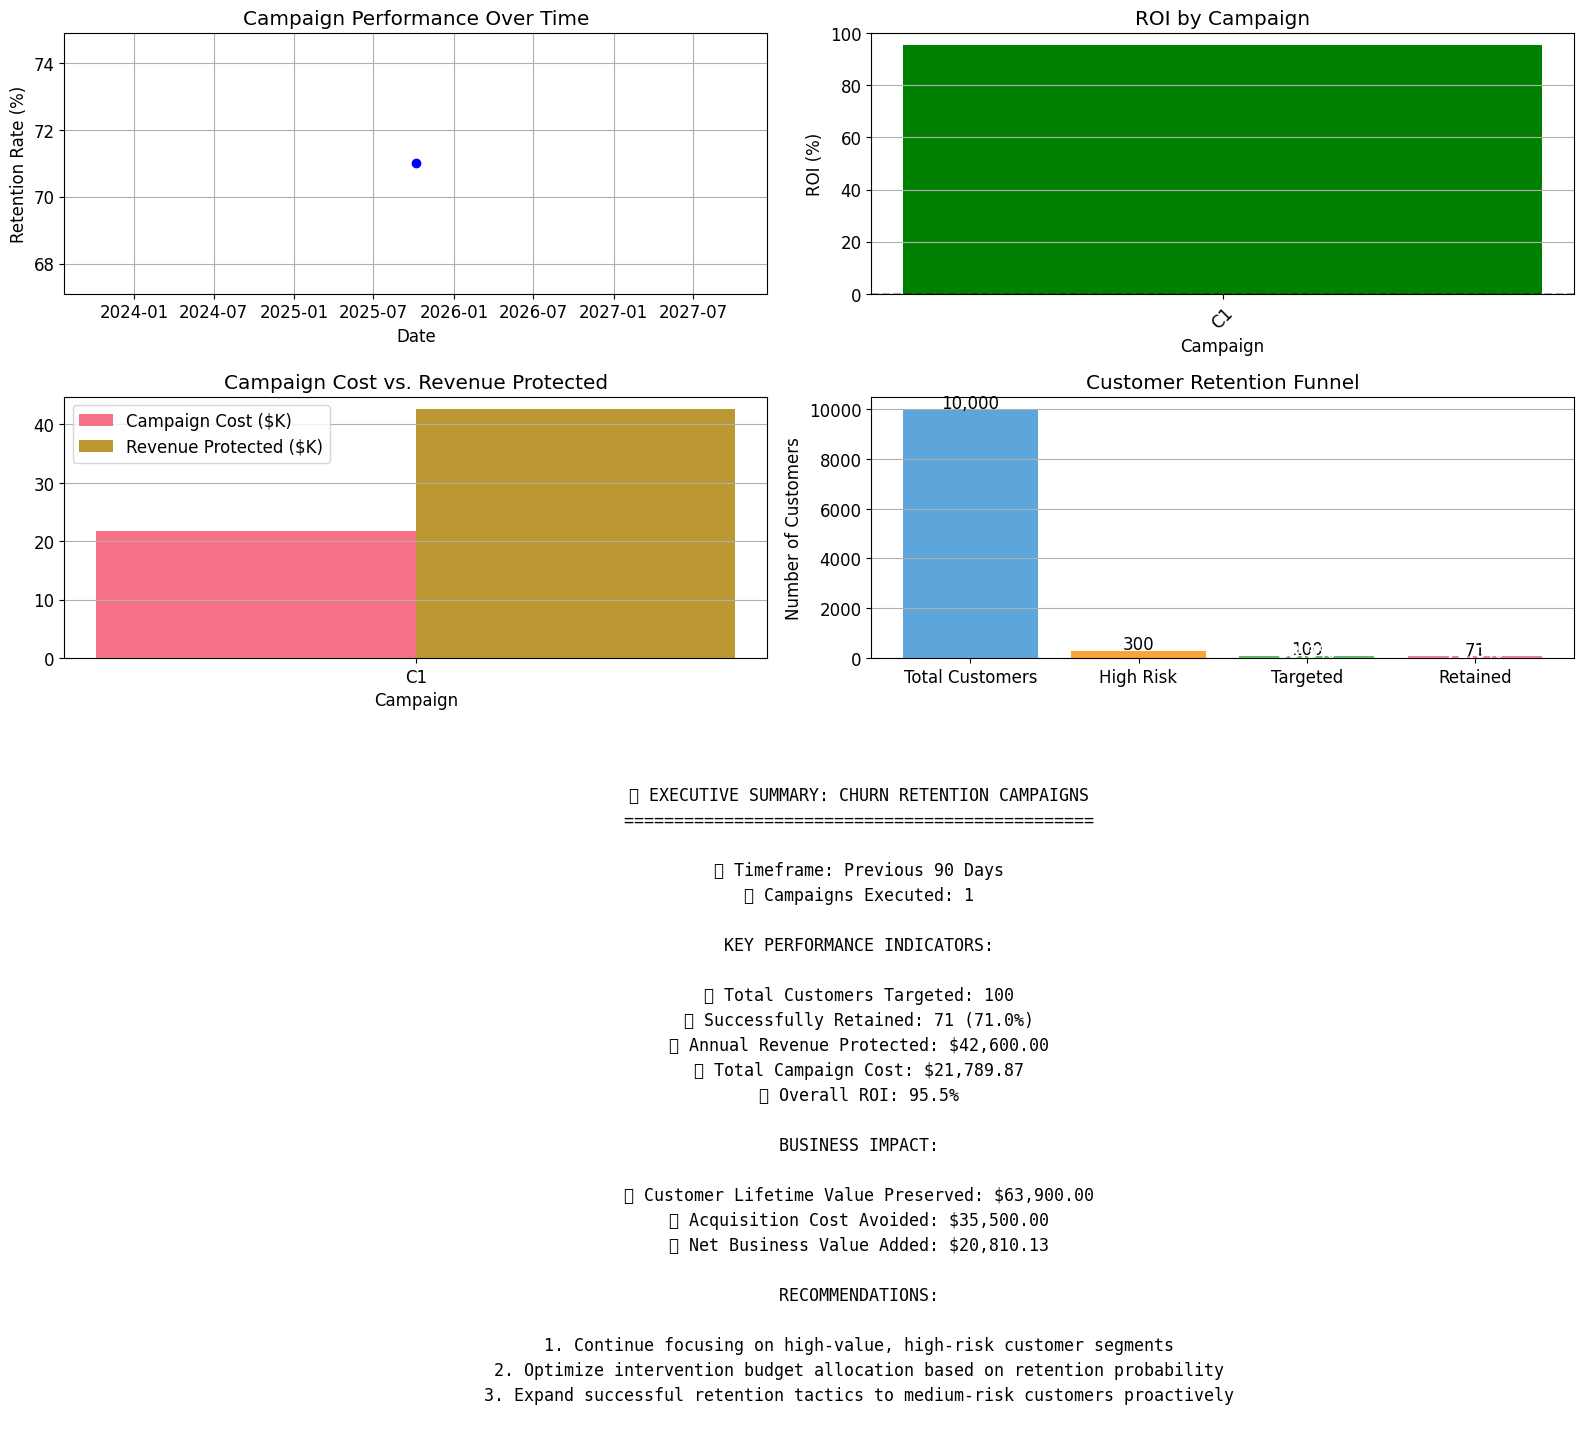


✅ Executive dashboard generated
   • Timeframe: Previous 90 days
   • Campaigns analyzed: 1
   • Overall retention rate: 71.0%
   • Overall ROI: 95.5%


In [13]:
# Generate executive dashboard
print("\n📊 Generating executive dashboard...")
dashboard_metrics = retention_system.generate_executive_dashboard(timeframe_days=90)

In [14]:
print("\n✅ Business implementation demonstrated successfully!")
print("""
🔑 Key Business Implementation Components:
1. Risk-based customer segmentation and prioritization
2. Targeted retention strategies by customer value and risk level
3. ROI-based intervention budget allocation
4. Campaign execution and tracking framework
5. Executive dashboard with business impact metrics
""")


✅ Business implementation demonstrated successfully!

🔑 Key Business Implementation Components:
1. Risk-based customer segmentation and prioritization
2. Targeted retention strategies by customer value and risk level
3. ROI-based intervention budget allocation
4. Campaign execution and tracking framework
5. Executive dashboard with business impact metrics

